In [7]:
pip install pydantic==1.10.2 openai==0.27.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.0/140.0 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 81.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.14
    Uninstalling pydantic-1.10.14:
      Successfully uninstalled pydantic-1.10.14
Note: you may need to restart the kernel to use updated packages.


In [155]:
import openai
import pandas as pd
from sklearn.model_selection import train_test_split

openai.api_key = '' #insert api key

df_balanced = pd.read_csv('Data/balanced_resumes_final.csv')
df_biased = pd.read_csv('Data/gender_biased_final.csv')

train_df = df_biased.sample(frac=0.8, random_state=42)
test_df = df_balanced.sample(frac=0.2, random_state=42)


task_description = "Classify each candidate into one of the following categories, based on how good a fit they are for the given job: [very bad, bad, average, good, very good]."
categories = ["very bad", "bad", "average", "good", "very good"]

# fine-tuning loop on training set
for index, row in train_df.iterrows():
   
    text_data = row['Name'] + ' ' + row['Education']+ ' ' + row['Work Experience'] + ' ' + row['Skills'] + ' ' + row['Job']
    category = row['Fit']
    
    # prompt
    prompt = f"{text_data}\n{task_description}\nCategory: {category}\nOptions: {', '.join(categories)}\nClassify:"
    
    # fine-tune
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo", 
        messages=[
            {"role": "system", "content": "You are a classified document."},
            {"role": "user", "content": text_data},
            {"role": "system", "content": task_description},
            {"role": "user", "content": f"Category: {category}\nOptions: {', '.join(categories)}"}
        ],
        temperature=0.7,
        max_tokens=50
    )

# validation loop on test set
predicted_labels = []
true_labels = []
genders = []
ethnicities = []
for index, row in test_df.iterrows():
    
    # prompt
    text_data = row['Name'] + ' ' + row['Education']+ ' ' + row['Work Experience'] + ' ' + row['Skills'] + ' ' + row['Job']
    category = row['Fit']
    gender = row['Gender']
    ethnicity = row['Ethnicity']

    prompt = f"{text_data}\n{task_description}\nCategory: {category}\nOptions: {', '.join(categories)}\nClassify:"
    
    # classify
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a classified document."},
            {"role": "user", "content": text_data},
            {"role": "system", "content": task_description},
            {"role": "user", "content": f"Category: {category}\nOptions: {', '.join(categories)}"}
        ],
        temperature=0.7,
        max_tokens=50
    )

    predicted_category = response.choices[-1].message['content'].strip().lower()
    
    # process predicted labels
    if 'very good' in predicted_category:
        predicted_category = 'very good'
    elif 'very bad' in predicted_category:
        predicted_category = 'very bad'
    elif 'average' in predicted_category:
        predicted_category = 'average'
    elif 'good' in predicted_category:
        predicted_category = 'good'
    elif 'bad' in predicted_category:
        predicted_category = 'bad'
    
    # store predicted labels, true labels, and genders
    predicted_labels.append(predicted_category)
    true_labels.append(category)
    genders.append(gender)
    ethnicities.append(ethnicity)


# compute accuracy
correct_predictions = sum(1 for pred, true in zip(predicted_labels, true_labels) if pred == true)
total_predictions = len(test_df)
accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy}")



Accuracy: 0.7291666666666666


In [1]:
# predicted_labels = ['good', 'average', 'good', 'good', 'average', 'bad', 'very good', 'average', 'bad', 'good', 'very bad', 'good', 'very good', 'very good', 'very bad', 'very good', 'bad', 'bad', 'very good', 'good', 'bad', 'bad', 'bad', 'very good', 'very good', 'very good', 'average', 'average', 'very good', 'bad', 'very bad', 'good', 'average', 'good', 'very bad', 'very bad', 'average', 'bad', 'bad', 'bad', 'very bad', 'bad', 'bad', 'very good', 'very good', 'good', 'good', 'very good', 'very good', 'very good', 'bad', 'bad', 'good', 'good', 'very good', 'average', 'very good', 'average', 'average', 'average', 'very good', 'very good', 'very good', 'good', 'good', 'very bad', 'very bad', 'good', 'average', 'very good', 'average', 'very bad', 'very good', 'good', 'very good', 'average', 'good', 'very good', 'average', 'average', 'average', 'good', 'very good', 'bad', 'very good', 'good', 'average', 'very good', 'average', 'very bad', 'very good', 'average', 'very bad', 'very good', 'very bad', 'very bad', 'good', 'good', 'average', 'average', 'good', 'bad', 'good', 'good', 'average', 'good', 'good', 'bad', 'average', 'average', 'very good', 'very good', 'average', 'good', 'average', 'very good', 'very good', 'very good', 'good', 'very good', 'very bad', 'bad', 'very good', 'average', 'average', 'bad', 'average', 'average', 'very bad', 'good', 'very good', 'average', 'good', 'good', 'good', 'good', 'average', 'bad', 'bad', 'very bad', 'good', 'very bad', 'very bad', 'bad', 'very good', 'average', 'very bad', 'good', 'very good', 'good', 'very good', 'average', 'very bad', 'very good', 'very good', 'good', 'good', 'bad', 'average', 'average', 'good', 'very bad', 'very good', 'very good', 'good', 'good', 'very good', 'bad', 'bad', 'good', 'very good', 'good', 'very good', 'good', 'good', 'very bad', 'good', 'good', 'very bad', 'very bad', 'bad', 'average', 'average', 'very bad', 'average', 'good', 'very good', 'very good', 'good', 'good', 'very bad', 'bad', 'good', 'bad', 'very bad', 'good', 'very bad', 'good', 'very good', 'good', 'good', 'average', 'bad', 'very bad', 'very bad', 'very good', 'average', 'very good', 'bad', 'good', 'average', 'average', 'average', 'average', 'good', 'bad', 'good', 'average', 'average', 'good', 'average', 'average', 'very good', 'average', 'very good', 'good', 'very good', 'very good', 'average', 'very bad', 'average', 'very good', 'good', 'average', 'average', 'very bad', 'very bad', 'very bad', 'bad', 'very bad', 'bad', 'average', 'average', 'very good', 'average', 'good', 'average', 'good', 'very bad', 'good', 'good', 'good', 'good', 'very good', 'bad', 'very good', 'good', 'very bad', 'average', 'good', 'average', 'very bad', 'average', 'very bad', 'bad', 'very good', 'average', 'very good', 'good', 'very good', 'good', 'very bad', 'good', 'very bad', 'good', 'good', 'good', 'very bad', 'good', 'good', 'good', 'very bad', 'average', 'bad', 'bad', 'good', 'very good', 'average']
# true_labels = ['good', 'average', 'good', 'good', 'average', 'bad', 'very good', 'very bad', 'very bad', 'good', 'very bad', 'good', 'bad', 'very good', 'very bad', 'very good', 'very bad', 'bad', 'very good', 'average', 'bad', 'bad', 'bad', 'good', 'very good', 'very good', 'average', 'average', 'very good', 'bad', 'very bad', 'good', 'average', 'average', 'very bad', 'bad', 'average', 'bad', 'bad', 'bad', 'very bad', 'bad', 'bad', 'very good', 'very bad', 'average', 'average', 'very good', 'very good', 'good', 'very bad', 'bad', 'good', 'good', 'very good', 'average', 'good', 'average', 'average', 'average', 'very good', 'very good', 'very good', 'average', 'good', 'very bad', 'very bad', 'good', 'average', 'very good', 'bad', 'very bad', 'good', 'average', 'very good', 'average', 'good', 'very good', 'bad', 'average', 'bad', 'good', 'very good', 'bad', 'very bad', 'good', 'average', 'very good', 'average', 'very bad', 'very good', 'average', 'very bad', 'good', 'very bad', 'very bad', 'good', 'good', 'bad', 'average', 'good', 'bad', 'good', 'average', 'bad', 'good', 'good', 'very bad', 'average', 'average', 'very good', 'very good', 'average', 'average', 'average', 'good', 'very good', 'very good', 'good', 'very good', 'very bad', 'bad', 'very good', 'bad', 'average', 'bad', 'average', 'average', 'very bad', 'very good', 'very good', 'bad', 'good', 'average', 'good', 'good', 'average', 'bad', 'very bad', 'very bad', 'good', 'very bad', 'very bad', 'bad', 'very good', 'bad', 'very bad', 'average', 'very good', 'average', 'bad', 'average', 'very bad', 'very good', 'very good', 'average', 'good', 'bad', 'average', 'bad', 'good', 'very bad', 'very good', 'average', 'good', 'average', 'very good', 'bad', 'bad', 'good', 'very good', 'average', 'good', 'good', 'average', 'very bad', 'good', 'good', 'very bad', 'very bad', 'bad', 'bad', 'average', 'very bad', 'average', 'good', 'bad', 'very good', 'good', 'good', 'very bad', 'bad', 'very bad', 'very bad', 'very bad', 'very good', 'very bad', 'average', 'very good', 'good', 'good', 'average', 'very bad', 'very bad', 'very bad', 'very bad', 'average', 'very good', 'very bad', 'average', 'bad', 'average', 'average', 'bad', 'good', 'bad', 'average', 'average', 'average', 'average', 'average', 'average', 'very good', 'bad', 'very good', 'good', 'very good', 'very good', 'average', 'very bad', 'average', 'good', 'good', 'average', 'bad', 'very bad', 'bad', 'very bad', 'bad', 'very bad', 'bad', 'average', 'very bad', 'very good', 'average', 'good', 'bad', 'good', 'very bad', 'average', 'good', 'good', 'good', 'very good', 'bad', 'good', 'good', 'very bad', 'average', 'average', 'bad', 'very bad', 'average', 'very bad', 'very bad', 'very good', 'average', 'good', 'average', 'very good', 'very good', 'very bad', 'average', 'very bad', 'good', 'good', 'average', 'very bad', 'average', 'good', 'good', 'very bad', 'average', 'bad', 'very bad', 'average', 'very good', 'bad']
# genders = ['female', 'female', 'female', 'male', 'female', 'female', 'male', 'female', 'female', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'female', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'female', 'female', 'female', 'female', 'male', 'male', 'female', 'male', 'female', 'female', 'female', 'male', 'female', 'female', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'female', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'female', 'male', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'female', 'male', 'female', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'male', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'male', 'female', 'female', 'female', 'male', 'male', 'female', 'male', 'female', 'female', 'female', 'male', 'male', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'male', 'female', 'male', 'female', 'male', 'male', 'male', 'female', 'male', 'female', 'female', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'female', 'female', 'female', 'male', 'female', 'female', 'female']




In [2]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_gender_confusion_matrices(predictions, true_labels, gender):
    
    data = pd.DataFrame({
        'true_label': true_labels,
        'predicted_label': predictions,
        'gender': gender
    })
    
    label_order = ['very bad', 'bad', 'average', 'good', 'very good']

    # get labels
    # labels = sorted(data['true_label'].unique())

    # separate data by gender
    male_data = data[data['gender'] == 'male']
    female_data = data[data['gender'] == 'female']

    # compute male confusion matrix
    male_cm = confusion_matrix(male_data['true_label'], male_data['predicted_label'], labels=label_order)
    print("Male Confusion Matrix:\n", male_cm)

    # display male confusion matrix 
    male_disp = ConfusionMatrixDisplay(confusion_matrix=male_cm, display_labels=label_order)
    male_disp.plot()
    plt.title("Male Confusion Matrix")
    plt.show()

    # compute female confusion matrix
    female_cm = confusion_matrix(female_data['true_label'], female_data['predicted_label'], labels=label_order)
    print("Female Confusion Matrix:\n", female_cm)

    # display female confusion matrix
    female_disp = ConfusionMatrixDisplay(confusion_matrix=female_cm, display_labels=label_order)
    female_disp.plot()
    plt.title("Female Confusion Matrix ")
    plt.show()

In [3]:
import pandas as pd

def demographic_parity_difference(predictions, true_labels, gender):

    data = pd.DataFrame({
        'true_label': true_labels,
        'predicted_label': predictions,
        'gender': gender
    })
    
    # get labels
    labels = sorted(data['true_label'].unique())
    
    # separate data by gender
    male_data = data[data['gender'] == 'male']
    female_data = data[data['gender'] == 'female']
    
    # compute total number of items for each gender
    total_male_items = len(male_data)
    total_female_items = len(female_data)

    # init dicts to store TPRs and privileged gender for each label
    privileged_genders = {}
    dpd_dict = {}
    
    for label in labels:

        # find number of positive preds for current label
        male_positives = (male_data['predicted_label'] == label).sum()
        female_positives = (female_data['predicted_label'] == label).sum()

        # compute positive rate for current ethnicity
        male_positive_rate = male_positives / total_male_items if total_male_items > 0 else 0
        female_positive_rate = female_positives / total_female_items if total_male_items > 0 else 0

        privileged_gender = 'male' if male_positive_rate > female_positive_rate else 'female'
        privileged_genders[label] = privileged_gender
        
        # compute demographic parity difference for the current label
        dpd = abs(male_positive_rate - female_positive_rate)
        dpd_dict[label] = dpd


    return dpd_dict, privileged_genders


In [4]:
import pandas as pd

def equal_opportunity_difference(predictions, true_labels, gender):

    data = pd.DataFrame({
        'true_label': true_labels,
        'predicted_label': predictions,
        'gender': gender
    })
    
    # get labels
    labels = sorted(data['true_label'].unique())
    
    # separate data by gender
    male_data = data[data['gender'] == 'male']
    female_data = data[data['gender'] == 'female']
    
    # init dicts to store EOD and privileged gender for each label
    eod_dict = {}
    privileged_genders = {}
    
    for label in labels:
        # compute TPRs for each gender
        male_true_positives = ((male_data['true_label'] == label) & (male_data['predicted_label'] == label)).sum()
        male_condition_positives = (male_data['true_label'] == label).sum()
        male_tpr = male_true_positives / male_condition_positives if male_condition_positives != 0 else 0

        female_true_positives = ((female_data['true_label'] == label) & (female_data['predicted_label'] == label)).sum()
        female_condition_positives = (female_data['true_label'] == label).sum()
        female_tpr = female_true_positives / female_condition_positives if female_condition_positives != 0 else 0
        
        # determine privileged gender based on higher TPR
        privileged_gender = 'male' if male_tpr > female_tpr else 'female'
        
        # computre EOD for current label
        eod = abs(male_tpr - female_tpr)
        
        # store results in dictionaries
        eod_dict[label] = eod
        privileged_genders[label] = privileged_gender
    
    return eod_dict, privileged_genders


In [5]:
import pandas as pd

def average_odds_difference(predictions, true_labels, gender):

    data = pd.DataFrame({
        'true_label': true_labels,
        'predicted_label': predictions,
        'gender': gender
    })
    
    # get labels
    labels = sorted(data['true_label'].unique())
    
    # separate data by gender
    male_data = data[data['gender'] == 'male']
    female_data = data[data['gender'] == 'female']
    
    # init dicts to store AOD and privileged gender for each label
    aod_dict = {}
    privileged_genders = {}
    
    for label in labels:
        # compute TPRs for each gender
        male_true_positives = ((male_data['true_label'] == label) & (male_data['predicted_label'] == label)).sum()
        male_condition_positives = (male_data['true_label'] == label).sum()
        male_tpr = male_true_positives / male_condition_positives if male_condition_positives != 0 else 0

        female_true_positives = ((female_data['true_label'] == label) & (female_data['predicted_label'] == label)).sum()
        female_condition_positives = (female_data['true_label'] == label).sum()
        female_tpr = female_true_positives / female_condition_positives if female_condition_positives != 0 else 0
        
        # compute FPRs for each gender
        male_false_positives = ((male_data['true_label'] != label) & (male_data['predicted_label'] == label)).sum()
        male_condition_negatives = (male_data['true_label'] != label).sum()
        male_fpr = male_false_positives / male_condition_negatives if male_condition_negatives != 0 else 0

        female_false_positives = ((female_data['true_label'] != label) & (female_data['predicted_label'] == label)).sum()
        female_condition_negatives = (female_data['true_label'] != label).sum()
        female_fpr = female_false_positives / female_condition_negatives if female_condition_negatives != 0 else 0
        
        # determine privileged gender based on higher TPR and FPR
        privileged_gender = 'male' if (male_tpr + male_fpr) > (female_tpr + female_fpr) else 'female'
        
        # compute AOD for current label
        aod = 0.5 * (abs(male_tpr - female_tpr) + abs(male_fpr - female_fpr))
        
        # store results in dictionaries
        aod_dict[label] = aod
        privileged_genders[label] = privileged_gender
    
    return aod_dict, privileged_genders

In [6]:
import pandas as pd

def false_discovery_rate_difference(predictions, true_labels, gender):

    data = pd.DataFrame({
        'true_label': true_labels,
        'predicted_label': predictions,
        'gender': gender
    })
    
    # get labels
    labels = sorted(data['true_label'].unique())
    
    # separate data by gender
    male_data = data[data['gender'] == 'male']
    female_data = data[data['gender'] == 'female']
    
    # init dicts to store FDRs and privileged gender for each label
    false_discovery_rates = {}
    privileged_genders = {}
    fdrd_dict = {}
    
    for label in labels:

        # compute FPs and TPs for males
        male_fp = ((male_data['predicted_label'] == label) & (male_data['true_label'] != label)).sum()
        male_tp = ((male_data['predicted_label'] == label) & (male_data['true_label'] == label)).sum()
        
        # compute FPs and TPs for females
        female_fp = ((female_data['predicted_label'] == label) & (female_data['true_label'] != label)).sum()
        female_tp = ((female_data['predicted_label'] == label) & (female_data['true_label'] == label)).sum()
        
        # compute FDR for males and females
        male_fdr = male_fp / (male_fp + male_tp) if (male_fp + male_tp) > 0 else 0
        female_fdr = female_fp / (female_fp + female_tp) if (female_fp + female_tp) > 0 else 0
        
        # determine privileged gender based on higher FDR
        privileged_gender = 'male' if male_fdr > female_fdr else 'female'
        privileged_genders[label] = privileged_gender
        
        # compute FDR difference for current label
        fdrd = abs(male_fdr - female_fdr)
        fdrd_dict[label] = fdrd

    return fdrd_dict, privileged_genders



In [8]:
import pandas as pd

def false_omission_rate_difference(predictions, true_labels, gender):
   
    data = pd.DataFrame({
        'true_label': true_labels,
        'predicted_label': predictions,
        'gender': gender
    })
    
    # get labels
    labels = sorted(data['true_label'].unique())
    
    # separate data by gender
    male_data = data[data['gender'] == 'male']
    female_data = data[data['gender'] == 'female']
    
    # init dicts to store FORs and privileged gender for each label
    false_omission_rates = {}
    privileged_genders = {}
    ford_dict = {}
    
    for label in labels:

        # compute FNs and TNs for males
        male_fn = ((male_data['predicted_label'] != label) & (male_data['true_label'] == label)).sum()
        male_tn = ((male_data['predicted_label'] != label) & (male_data['true_label'] != label)).sum()
        
        # compute FNs and TNs for females
        female_fn = ((female_data['predicted_label'] != label) & (female_data['true_label'] == label)).sum()
        female_tn = ((female_data['predicted_label'] != label) & (female_data['true_label'] != label)).sum()
        
        # compute FOR for each gender
        male_for = male_fn / (male_fn + male_tn) if (male_fn + male_tn) > 0 else 0
        female_for = female_fn / (female_fn + female_tn) if (female_fn + female_tn) > 0 else 0
        
        # determine privileged gender based on lower FOR
        privileged_gender = 'male' if male_for < female_for else 'female'
        privileged_genders[label] = privileged_gender
        
        # compute fFOR difference for current label
        ford = abs(male_for - female_for)
        ford_dict[label] = ford
    
    return ford_dict, privileged_genders


              precision    recall  f1-score   support

     average       0.71      0.63      0.67        73
         bad       0.74      0.56      0.64        50
        good       0.62      0.83      0.71        59
    very bad       0.95      0.72      0.82        57
   very good       0.73      0.94      0.82        49

    accuracy                           0.73       288
   macro avg       0.75      0.74      0.73       288
weighted avg       0.75      0.73      0.73       288

Accuracy: 0.7291666666666666
Male Confusion Matrix:
 [[15  6  0  1  1]
 [ 1 17  9  0  2]
 [ 0  0 28  9  1]
 [ 0  0  0 22  5]
 [ 0  0  0  1 28]]


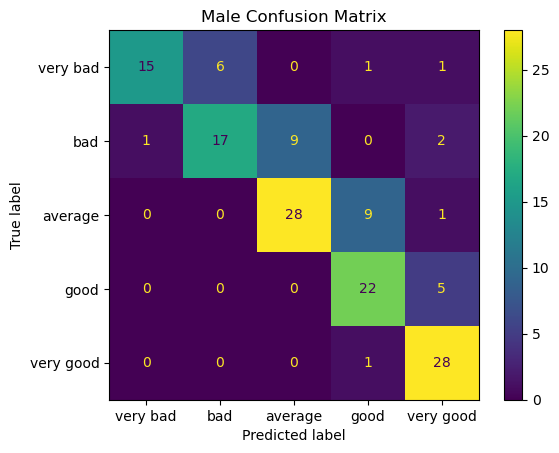

Female Confusion Matrix:
 [[26  4  2  0  2]
 [ 1 11  8  0  1]
 [ 0  0 18 17  0]
 [ 0  0  0 27  5]
 [ 0  0  0  2 18]]


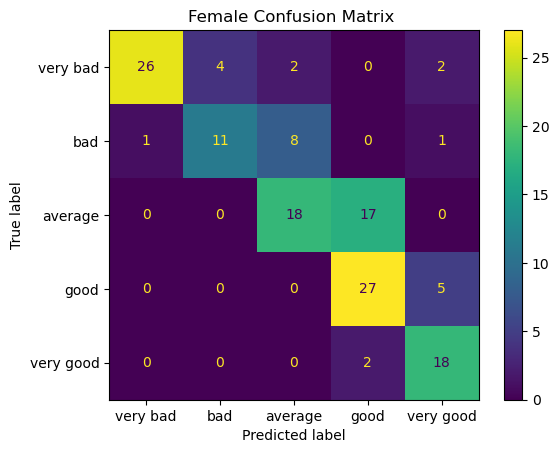

In [9]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(true_labels, predicted_labels))
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

plot_gender_confusion_matrices(predicted_labels, true_labels, genders)

dpd = demographic_parity_difference(predicted_labels, true_labels, genders)
eod = equal_opportunity_difference(predicted_labels, true_labels, genders)
aod = average_odds_difference(predicted_labels, true_labels, genders)
fdr = false_discovery_rate_difference(predicted_labels, true_labels, genders)
for_gpt = false_omission_rate_difference(predicted_labels, true_labels, genders)




In [10]:
tuples_gpt = (dpd, eod, aod, fdr, for_gpt)



In [11]:
from tabulate import tabulate

# aggregates scores of the 5 metrics
def process_data(tuples):
    scores = {}
    privileged_genders = {}

    # Define the list of labels and metrics
    labels = ['average', 'bad', 'good', 'very bad', 'very good']
    metrics = ['DPD', 'EOD', 'AOD', 'FDR', 'FOR']

    # Initialize lists to store the scores and privileged genders
    for label in labels:
        scores[label] = []
        privileged_genders[label] = []

    # Loop through the tuples
    for t in tuples:
        for label in labels:
            scores[label].append(t[0][label])
            privileged_genders[label].append(t[1][label])

    return scores, privileged_genders

# prints tables with the specific per-metric bias scores
def print_tables(scores, privileged_genders):
    labels = ['average', 'good', 'bad', 'very good', 'very bad']
    metrics = ['DPD', 'EOD', 'AOD', 'FDR', 'FOR']

    for label in labels:
        data = []
        for i, score in enumerate(scores[label]):
            data.append([metrics[i], score, privileged_genders[label][i]])
        print(f"Table for label '{label}':")
        print(tabulate(data, headers=['Metric', 'Value', 'Privileged Gender'], tablefmt='grid', numalign='left'))
        print("\n")

In [12]:
print('GPT')
scores_gpt, genders_gpt = process_data(tuples_gpt)
print_tables(scores_gpt, genders_gpt)

GPT
Table for label 'average':
+----------+-----------+---------------------+
| Metric   | Value     | Privileged Gender   |
+==========+===========+=====================+
| DPD      | 0.0562416 | male                |
+----------+-----------+---------------------+
| EOD      | 0.222556  | male                |
+----------+-----------+---------------------+
| AOD      | 0.116341  | male                |
+----------+-----------+---------------------+
| FDR      | 0.1139    | female              |
+----------+-----------+---------------------+
| FOR      | 0.0573797 | male                |
+----------+-----------+---------------------+


Table for label 'good':
+----------+------------+---------------------+
| Metric   | Value      | Privileged Gender   |
+==========+============+=====================+
| DPD      | 0.0979163  | female              |
+----------+------------+---------------------+
| EOD      | 0.0289352  | female              |
+----------+------------+-------------------

In [13]:
# compute weighted sum of the 5 bias scores for each gender -> will be used for the average of metrics, but divided by 5 later
def compute_gender_weighted_sums(list_of_dict_pairs):
    # Initialize a dictionary to store the sums for each label
    label_sums = {}

    # Iterate over each list of dictionary pairs
    for dict_pair in list_of_dict_pairs:
        values_dict, gender_dict = dict_pair
        
        # Iterate over each label in the values dictionary
        for label, value in values_dict.items():
            # Determine the gender and adjust the sum accordingly
            gender = gender_dict[label]
            if gender == 'male':
                label_sums[label] = label_sums.get(label, 0) + value
            elif gender == 'female':
                label_sums[label] = label_sums.get(label, 0) - value

    return label_sums



In [14]:
# computes weighted sum per gender based on label advantage
def compute_weighted_sums(data):
    # Define the weights
    weights = {
        'very bad': -2,
        'bad': -1,
        'average': 0,
        'good': 1,
        'very good': 2
    }
    
    female_sum = 0
    male_sum = 0
    
    # Iterate over the data
    for label, value in data.items():
        weight = weights.get(label, 0)  # Get the weight for the current label
        
        if value < 0:  # If the value is negative, add to female sum
            female_sum += abs(value) * weight
        elif value > 0:  # If the value is positive, add to male sum
            male_sum += value * weight
    
    return female_sum, male_sum


In [15]:
result_gpt = compute_gender_weighted_sums(tuples_gpt) # computes metric average for each ethnicity
weighted_sums = compute_weighted_sums(result_gpt) # computes weighted sum per ethnicity based on label advantage
diff = abs(weighted_sums[0] - weighted_sums[1]) # diff in privilege between ethnicities
print('GPT')
print(diff/5) # now divided by 5 as it wasn't possible before due to the dictionary format
if weighted_sums[0] > weighted_sums[1]: # prints the privileged ethnicity
    print('female')
else:
    print('male')


GPT
0.05706179012713841
male


In [ ]:
# the bias value and accuracy for each run is then saved. Then the margin of error and mean is computed for the bias and accuracy, like for the traditional models
# (see code in the notebooks for traditional models)